# Boston Housing Price Regression (mglearn)

## Load Dataset

In [1]:
import mglearn

X, y = mglearn.datasets.load_extended_boston()

C:\Users\memor\tools\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [2]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (506, 104)
y shape: (506,)


In [3]:
X[:5]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.24000000e-02, 1.22067449e-02,
        0.00000000e+00, 5.66666667e-02, 1.03950948e-01, 1.15489186e-01,
        4.84565650e-02, 0.00000000e+00, 3.74427481e-02, 5.17021277e-02,
        1.80000000e-01, 1.61423841e-02, 4.59890803e-03, 0.00000000e+00,
        2.13492451e-02, 3.91636638e-02, 4.35107109e-02, 1.82560780e-02,
        0.00000000e+00, 1.41066072e-02, 1.94788482e-02, 6.78152493e-02,
        6.08166557e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

## Split Dataset into Train and Test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (379, 104)
y_train shape:  (379,)
X_test shape:  (127, 104)
y_test shape:  (127,)


## Train and Evaluate Model

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Training set score: {:.2f}".format(linear_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_model.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## Ridge Regression

In [6]:
from sklearn.linear_model import Ridge

ridge_model1 = Ridge(alpha=1)
ridge_model1.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model1.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [7]:
ridge_model10 = Ridge(alpha=10)
ridge_model10.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [8]:
ridge_model01 = Ridge(alpha=0.1)
ridge_model01.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge_model01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


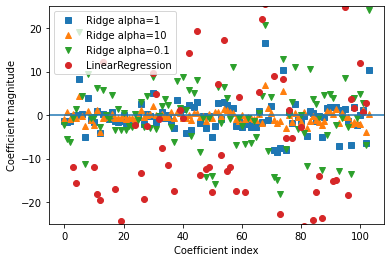

In [9]:
from matplotlib import pyplot as plt

plt.plot(ridge_model1.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_model10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge_model01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(linear_model.coef_, 'o', label="LinearRegression")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

## Lasso Regression

In [10]:
import numpy as np
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [11]:
lasso_model001 = Lasso(alpha=0.01, max_iter=100000)
lasso_model001.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [12]:
lasso_model00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso_model00001.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso_model00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_model00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


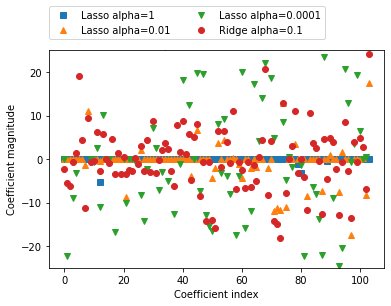

In [13]:
from matplotlib import pyplot as plt

plt.plot(lasso_model.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_model001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_model00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge_model01.coef_, 'o', label="Ridge alpha=0.1")

plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(ncol=2, loc=(0, 1.05))